### IMPORTANCIA DE LAS VARIABLES EN EL PRECIO DE COMPRA DE UNA VIVIENDA

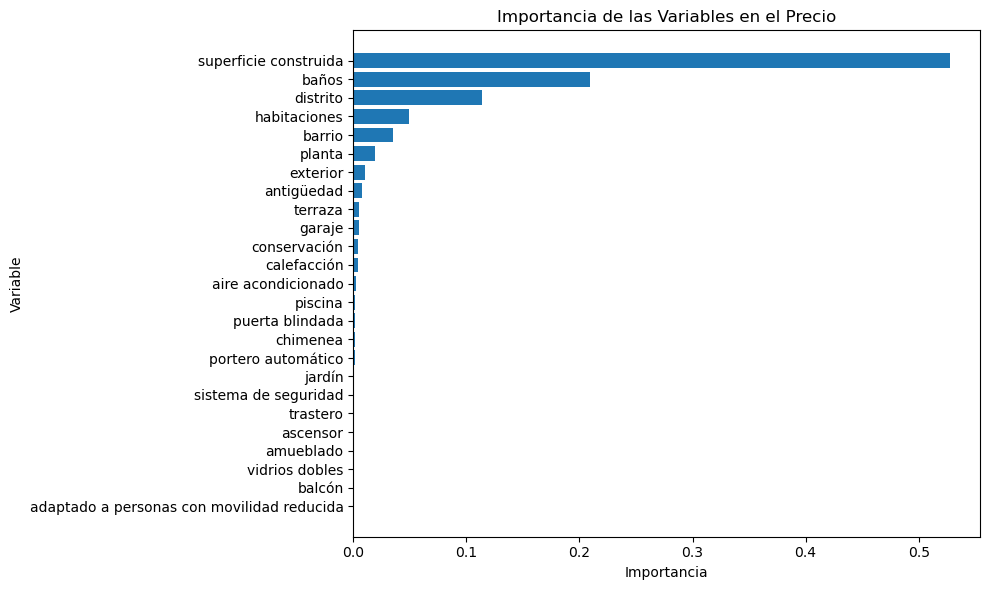

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

df = pd.read_csv('madrid_sale_properties_cleaned.csv')

# Reemplazar valores booleanos a strings
bool_like_cols = ['adaptado a personas con movilidad reducida', 'aire acondicionado', 'amueblado',
                  'ascensor', 'balcón', 'calefacción', 'chimenea', 'exterior', 'garaje',
                  'jardín', 'piscina', 'terraza', 'trastero', 'vidrios dobles', 'portero automático',
                   'puerta blindada', 'sistema de seguridad']

for col in bool_like_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().map({'true': 1, 'false': 0})
        df[col] = df[col].fillna(0)

# Eliminar columnas irrelevantes o que no se pueden procesar directamente. Eliminamos también superficie útil para
# no interferir con superficie construida.
drop_cols = ['latitude', 'longitude', 'energy_consumption_rating', 'energy_consumption_value',
             'energy_emissions_rating', 'energy_emissions_value', 'superficie útil']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Codificar variables categóricas
categorical_cols = ['barrio', 'distrito', 'antigüedad', 'conservación'
                    ]
label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

df = df.fillna(0)

# Separar variables predictoras y objetivo
X = df.drop(columns=['price_eur'])
y = df['price_eur']

# Entrenar modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia columnas
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables en el Precio')
plt.tight_layout()
plt.show()


### GRÁFICO DE RADAR COMPARANDO CARACTERÍSTICAS DE VENTA DE DOS VIVIENDAS

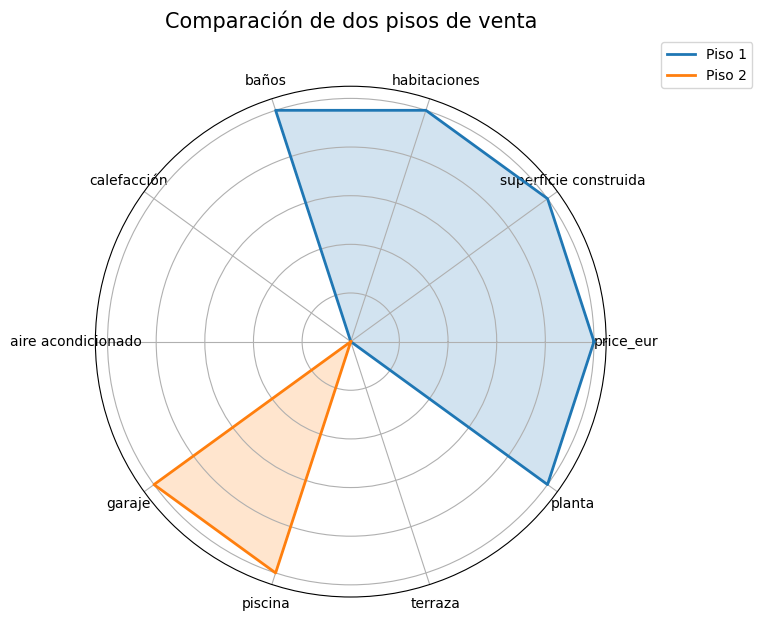

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import pi

# Cargar datos
df = pd.read_csv('madrid_sale_properties_cleaned.csv') 

# Selección de características
features = [
    'price_eur', 'superficie construida', 'habitaciones', 'baños',
    'calefacción', 'aire acondicionado', 'garaje', 'piscina', 'terraza', 'planta'
]

# Asegurar valores booleanos como 0/1
bool_cols = ['calefacción', 'aire acondicionado', 'garaje', 'piscina', 'terraza']
for col in bool_cols:
    df[col] = df[col].astype(str).str.lower().map({'true': 1, 'false': 0})
    df[col] = df[col].fillna(0)

# Asegurar que los valores numéricos estén correctamente formateados
for col in ['price_eur', 'superficie construida', 'habitaciones', 'baños']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Seleccionar dos pisos por índice
piso_1 = df.iloc[2][features]
piso_2 = df.iloc[4][features]

# Comparación
comparison_df = pd.DataFrame([piso_1, piso_2], index=['Piso 1', 'Piso 2'])

# Escalado
scaler = MinMaxScaler()
scaled = scaler.fit_transform(comparison_df)
scaled_df = pd.DataFrame(scaled, columns=features, index=comparison_df.index)

# Radar plot
def plot_radar(data, labels, title):
    N = len(labels)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i in range(len(data)):
        values = data.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=data.index[i])
        ax.fill(angles, values, alpha=0.2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

plot_radar(scaled_df, features, "Comparación de dos pisos de venta")


### IMPORTANCIA DE LAS VARIABLES EN EL PRECIO DE ALQUILER DE UNA VIVIENDA

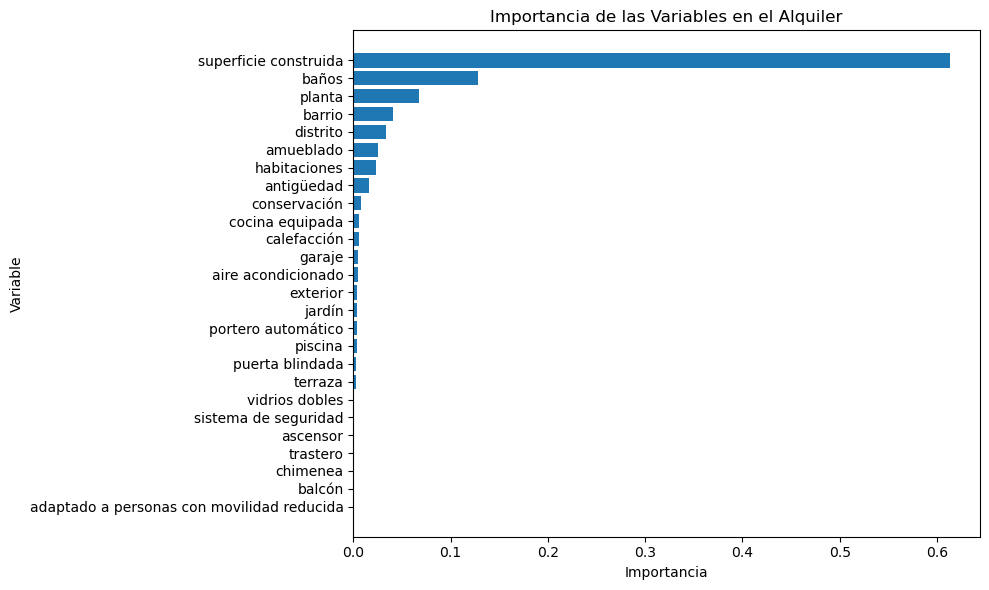

In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Leer el archivo CSV
df = pd.read_csv("madrid_rental_properties_cleaned.csv")

# Reemplazar valores booleanos a strings
bool_like_cols = ['adaptado a personas con movilidad reducida', 'aire acondicionado', 'amueblado',
                  'ascensor', 'balcón', 'calefacción', 'chimenea', 'exterior', 'garaje',
                  'jardín', 'piscina', 'terraza', 'trastero', 'vidrios dobles', 'cocina equipada',
                  'portero automático', 'puerta blindada', 'sistema de seguridad']

for col in bool_like_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().map({'true': 1, 'false': 0, 'si': 1, 'no': 0})
        df[col] = df[col].fillna(0)

# Eliminar columnas irrelevantes o que no se pueden procesar directamente. Eliminamos también superficie útil para
# no interferir con superficie construida.
drop_cols = ['latitude', 'longitude', 'energy_consumption_rating', 'energy_emissions_rating', 
             'referencia', 'listing_type', 'energy_consumption_value',
             'energy_emissions_value', 'superficie útil']

df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Codificar variables categóricas
categorical_cols = ['barrio', 'distrito', 'antigüedad', 'conservación']
label_encoders = {}

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

df = df.fillna(0)

# Separar variables predictoras y objetivo
X = df.drop(columns=['rent_eur_per_month'])
y = df['rent_eur_per_month']

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Obtener importancia columnas
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=True)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Variables en el Alquiler')
plt.tight_layout()
plt.show()


### GRÁFICO DE RADAR COMPARANDO CARACTERÍSTICAS DE ALQUILER DE DOS VIVIENDAS

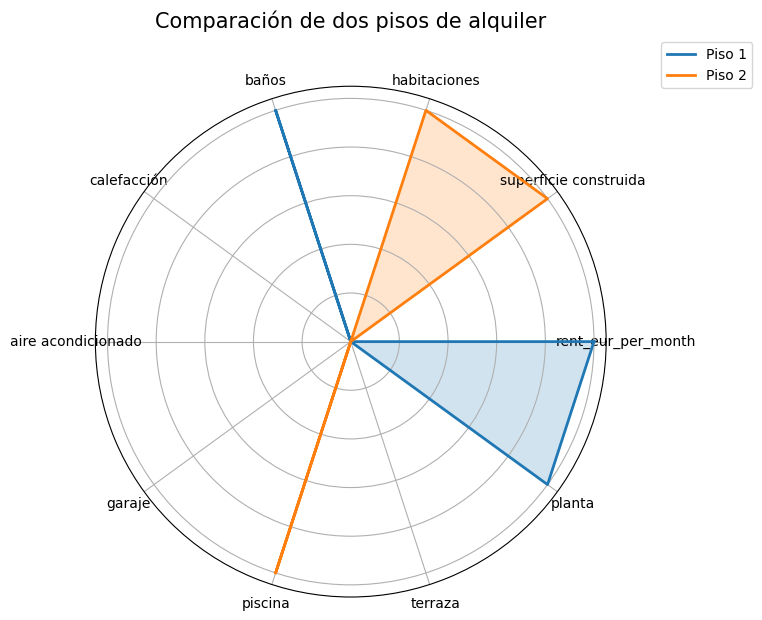

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import pi

# Cargar datos
df = pd.read_csv('madrid_rental_properties_cleaned.csv') 

# Selección de características
features = [
    'rent_eur_per_month', 'superficie construida', 'habitaciones', 'baños',
    'calefacción', 'aire acondicionado', 'garaje', 'piscina', 'terraza', 'planta'
]

# Asegurar valores booleanos como 0/1
bool_cols = ['calefacción', 'aire acondicionado', 'garaje', 'piscina', 'terraza']
for col in bool_cols:
    df[col] = df[col].astype(str).str.lower().map({'true': 1, 'false': 0})
    df[col] = df[col].fillna(0)

# Asegurar que los valores numéricos estén correctamente formateados
for col in ['rent_eur_per_month', 'superficie construida', 'habitaciones', 'baños']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Seleccionar dos pisos por índice
piso_1 = df.iloc[0][features]
piso_2 = df.iloc[12][features]

# Comparación
comparison_df = pd.DataFrame([piso_1, piso_2], index=['Piso 1', 'Piso 2'])

# Escalado
scaler = MinMaxScaler()
scaled = scaler.fit_transform(comparison_df)
scaled_df = pd.DataFrame(scaled, columns=features, index=comparison_df.index)

# Radar plot
def plot_radar(data, labels, title):
    N = len(labels)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i in range(len(data)):
        values = data.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, label=data.index[i])
        ax.fill(angles, values, alpha=0.2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(title, size=15, y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.show()

plot_radar(scaled_df, features, "Comparación de dos pisos de alquiler")